<a href="https://colab.research.google.com/github/EmmaKLofthouse/vegetable_identifier/blob/main/vegetable_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

# VegNet: Neural Network Vegetable Classifier

## Goal
Develop a model capable of identifying a vegetable from an image.

# Table of Contents

# Introduction

In this project, we utilize deep learning, particularly convolutional neural networks (CNNs), to automatically identify different types of vegetables from images. By leveraging a diverse training dataset collected from google images and CNN architectures, our model learns to discern intricate features and patterns, enabling precise vegetable classification. With applications ranging from optimizing inventory management to aiding in crop monitoring, our work aims to streamline processes and enhance efficiency in agriculture and culinary domains.

# Dataset

# Loading modules

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Preprocessing Data

## Image Augmentation

Before feeding raw images into our deep learning model for vegetable classification, several preprocessing steps are essential to ensure optimal performance and accuracy. Firstly, we apply data augmentation techniques such as rotation, flipping, and scaling to increase the diversity of our training data and enhance the model's robustness against variations in vegetable appearance.

Next, we resize all images to a standardized resolution, typically square dimensions such as 150x150 pixels, to ensure uniformity across the dataset and normalize the pixel values to between 0 and 1.

In [54]:
def augment_images(input_dir, output_dir, num_augmentations=5, target_size=(150, 150)):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    rotation_range = 30  # Rotation angle range in degrees
    brightness_range = 0.5  # Brightness adjustment range

    # Iterate through each folder (each vegetable category)
    for category in os.listdir(input_dir):
        print(f"Augmenting images for category: {category}")
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        # Process each image in the category folder
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)

            # Save the original image
            output_img_basename = os.path.splitext(filename)[0]  # Remove file extension
            output_img_path = os.path.join(output_category_path, f"{output_img_basename}_original.jpg")

            img_original = img.copy()
            img_resized = cv2.resize(img_original, target_size)
            img_normalized = img_resized.astype(np.float32) / 255.0
            cv2.imwrite(output_img_path, img_normalized)

            for i in range(num_augmentations):
                augmented_img = img.copy()

                # Rotate the image
                angle = random.uniform(-rotation_range, rotation_range)
                rows, cols = augmented_img.shape[:2]
                rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
                augmented_img = cv2.warpAffine(augmented_img, rotation_matrix, (cols, rows))

                # Flip the image horizontally
                if random.random() < 0.5:
                    augmented_img = cv2.flip(augmented_img, 1)

                # Adjust brightness
                brightness_factor = 1.0 + random.uniform(-brightness_range, brightness_range)
                augmented_img = np.clip(augmented_img * brightness_factor, 0, 255).astype(np.uint8)

                # Resize and normalize
                #augmented_img_resized = cv2.resize(augmented_img, target_size)
                #augmented_img_normalized = augmented_img_resized.astype(np.float32) / 255.0

                # Save the augmented image
                output_img_path = os.path.join(output_category_path, f"{output_img_basename}_augmented_{i+1}.jpg")
                cv2.imwrite(output_img_path, augmented_img)#_normalized)

In [55]:
raw_dir = "/content/drive/MyDrive/Projects/vegetable_identifier/raw_images"
processed_dir = "/content/drive/MyDrive/Projects/vegetable_identifier/processed_images"

# Perform data augmentation
augment_images(raw_dir, processed_dir, num_augmentations=3)

Augmenting images for category: carrot
Augmenting images for category: broccoli
Augmenting images for category: peas
Augmenting images for category: onion


In [63]:
import os
import cv2
import numpy as np
import random

def augment_and_preprocess_images(input_dir, output_dir, num_augmentations=5, target_size=(150, 150)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    rotation_range = 30  # Rotation angle range in degrees
    brightness_range = 0.2  # Brightness adjustment range

    # Function to perform rotation, flipping, and brightness adjustment
    def apply_augmentation(img):
        augmented_img = img.copy()

        # Rotate the image
        angle = random.uniform(-rotation_range, rotation_range)
        rows, cols = augmented_img.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        augmented_img = cv2.warpAffine(augmented_img, rotation_matrix, (cols, rows))

        # Flip the image horizontally
        if random.random() < 0.5:
            augmented_img = cv2.flip(augmented_img, 1)

        # Adjust brightness
        brightness_factor = 1.0 + random.uniform(-brightness_range, brightness_range)
        augmented_img = np.clip(augmented_img * brightness_factor, 0, 255).astype(np.uint8)

        return augmented_img

    def apply_resizing_and_normalization(img):
        # Resize the image to the target size
        img_resized = cv2.resize(img, target_size)

        # Normalize pixel values to range [0, 1]
        img_normalized = img_resized.astype(np.float32) / 255.0

        return img_normalized

    # Iterate through each folder (each vegetable category)
    for category in os.listdir(input_dir):
        print(f"Processing folder {category}...")
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        # Process each image in the category folder
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)

            img_normalized  = apply_resizing_and_normalization(img)

            # Save the preprocessed image
            output_img_basename = os.path.splitext(filename)[0]  # Remove file extension
            output_img_path = os.path.join(output_category_path, f"{output_img_basename}_original.jpg")
            cv2.imwrite(output_img_path, img_normalized * 255)

            # Apply augmentations
            for i in range(num_augmentations):
                augmented_img = apply_augmentation(img)

                augmented_img_normalized = apply_resizing_and_normalization(augmented_img)

                # Save the augmented image
                output_img_path = os.path.join(output_category_path, f"{output_img_basename}_augmented_{i+1}.jpg")
                cv2.imwrite(output_img_path, augmented_img_normalized * 255)



In [64]:
augment_and_preprocess_images(raw_dir, processed_dir, num_augmentations=3)

Processing folder carrot...
Processing folder broccoli...
Processing folder peas...
Processing folder onion...


## Display processed images

Original image for category: carrot


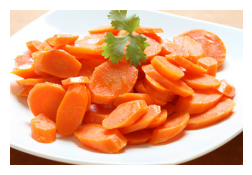

Processed images for category: carrot


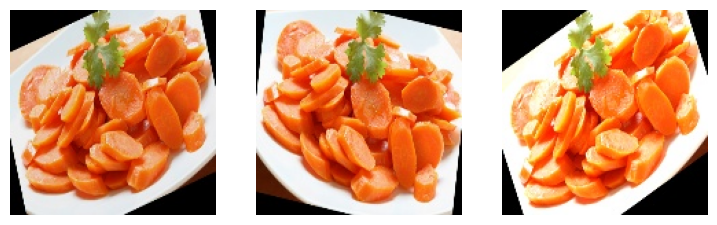

Original image for category: broccoli


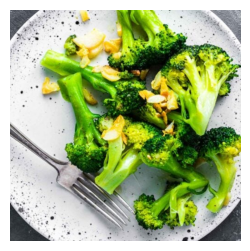

Processed images for category: broccoli


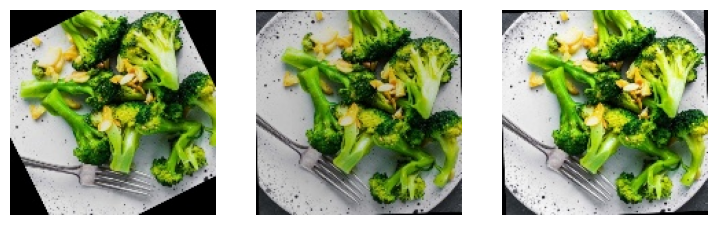

Original image for category: peas


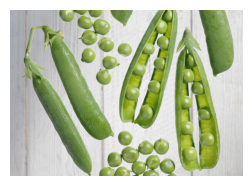

Processed images for category: peas


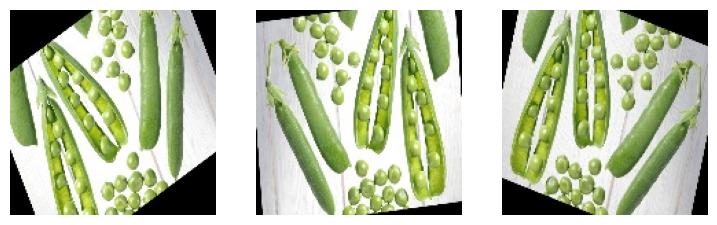

Original image for category: onion


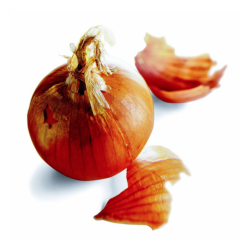

Processed images for category: onion


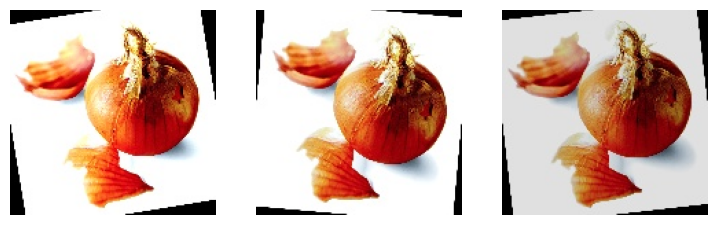

In [65]:
def show_sample_images(input_dir, processed_dir, num_samples=1):
    categories = os.listdir(input_dir)
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)

        # Show original images
        print(f"Original image for category: {category}")
        plt.figure(figsize=(3, 3))

        random_id = random.randint(0,len(images))

        img_path = os.path.join(category_path, images[random_id])

        random_name = img_path.split("/")[-1].split(".jpg")[0]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Show n processed images
        processed_category_path = os.path.join(processed_dir, category)
        processed_images = os.listdir(processed_category_path)
        aug_images = [name for name in processed_images if random_name + "_augmented" in name]

        print(f"Processed images for category: {category}")
        fig, axes = plt.subplots(1, num_samples, figsize=(9,3))

        for i in range(num_samples):
            img_path = os.path.join(processed_category_path, aug_images[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB for display
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()

processed_dir = "/content/drive/MyDrive/Projects/vegetable_identifier/processed_images"
show_sample_images(raw_dir,processed_dir, 3)
